In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r'C:\Users\Satyam\Downloads\placement.csv')

In [3]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26,yes
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [4]:
import seaborn as sns 

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

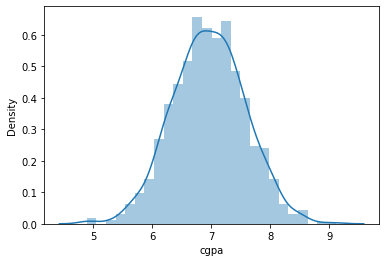

In [5]:
sns.distplot(df['cgpa'])

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

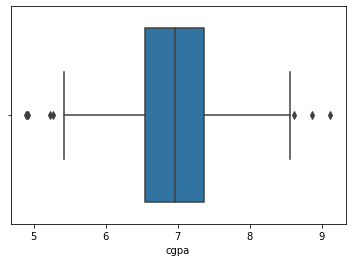

In [6]:
sns.boxplot(df['cgpa'])

In [7]:
df['cgpa'].max()

9.12

In [8]:
df['cgpa'].min()

4.89

In [9]:
df['cgpa'].std()

0.6158978751323894

In [10]:
df['cgpa'].mean()

6.96124000000001

In [11]:
# mean+3*std
upperlimit = df['cgpa'].mean() + 3 * df['cgpa'].std()

In [12]:
upperlimit

8.808933625397177

In [13]:
df[df['cgpa']>8.80]

,cgpa,placement_exam_marks,placed
995,8.87,44,1
996,9.12,65,1


In [14]:
# mean-3*std
lowerlimit = df['cgpa'].mean() - 3 * df['cgpa'].std()

In [15]:
lowerlimit

5.113546374602842

In [16]:
df[df['cgpa']<5]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
997,4.89,34,0
999,4.90,10,1


In [17]:
df[(df['cgpa']>8.8)| (df['cgpa']<5)]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


In [18]:
# Trimming & capping.


# Trimming

In [19]:
df[(df['cgpa']>8.8)| (df['cgpa']<5)]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


In [20]:
newdf = df[(df['cgpa']<8.8) & (df['cgpa']>5)]

In [21]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,yes
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1
994,6.48,63,0


# Capping

In [22]:
upperlimit

8.808933625397177

In [23]:
lowerlimit

5.113546374602842

In [24]:
import numpy as np

In [25]:
df['cgpa']  = np.where(
df['cgpa']>upperlimit,upperlimit,
np.where(df['cgpa']<lowerlimit,lowerlimit,df['cgpa']))

In [26]:
df['cgpa']

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

# Skewed Graph


C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

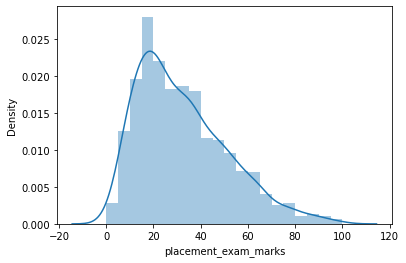

In [50]:
sns.distplot(df['placement_exam_marks'],bins = 20)

In [27]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [33]:
# finding IQR
per25 = df['placement_exam_marks'].quantile(0.25)

In [31]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [34]:
per75 = df['placement_exam_marks'].quantile(0.75)

In [35]:
iqr = per75 - per25

In [36]:
iqr

27.0

In [39]:
# Q1-1.5*iqr
# Q3+1.5*iqr

upper_limit = per75+1.5*iqr

In [40]:
upper_limit

84.5

In [42]:
df[df['placement_exam_marks']>84.5].shape[0]

15

In [43]:
lower_limit = per25-1.5*iqr

In [44]:
lower_limit

-23.5

In [45]:
df[df['placement_exam_marks']<-23.5]

,cgpa,placement_exam_marks,placed


In [46]:
# trimming
newdf = df[df['placement_exam_marks']<84.5]

In [47]:
newdf

,cgpa,placement_exam_marks,placed
0,7.190000,26,yes
1,7.460000,38,1
2,7.540000,40,1
3,6.420000,8,1
4,7.230000,17,0
...,...,...,...
995,8.808934,44,1
996,8.808934,65,1
997,5.113546,34,0
998,8.620000,46,1


C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

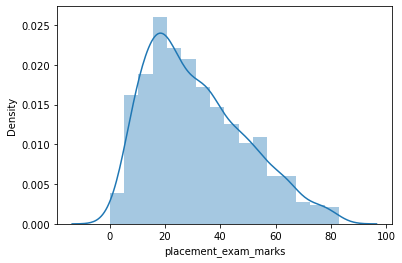

In [48]:
sns.distplot(newdf['placement_exam_marks'])

In [51]:
# capping 
df['placement_exam_marks'] = np.where(df['placement_exam_marks']>upper_limit,upper_limit,np.where(df['placement_exam_marks']<lower_limit,lower_limit,df['placement_exam_marks']))

In [52]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,yes
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

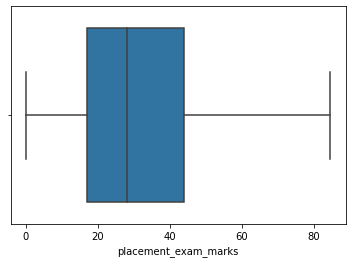

In [53]:
sns.boxplot(df['placement_exam_marks'])

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

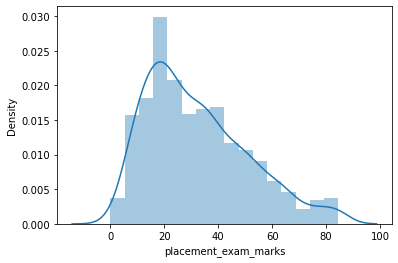

In [54]:
sns.distplot(df['placement_exam_marks'])

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

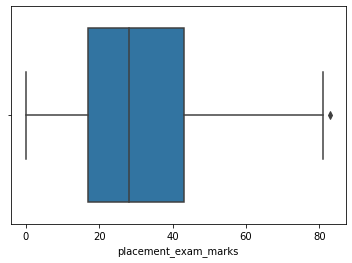

In [56]:
sns.boxplot(newdf['placement_exam_marks'])